In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Flatten, Dense, MaxPooling2D)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid', context = 'talk')

The function sns.set(style='darkgrid', context='talk') is used to set the aesthetic style and the scaling of the plot elements in seaborn1. The style parameter controls things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements. The context parameter controls the size of the labels, lines, and other elements of the plot, making it easy to adapt your figure for different contexts such as a paper, a talk, or a poster1.

The style='darkgrid' means that the background of the plot will be dark and a grid will be drawn to help read the plot. The context='talk' means that the plot elements will be scaled up slightly to make them more visible in a talk setting1. You can also use other values for these parameters, such as style='white' or context='paper', depending on your preference and purpose1.

In [24]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, test_size = 10000, random_state = 42)

In [28]:
print(" ----Training data----")
print(f"Data shape: {train_data.shape}")
print(f"Label shape: {train_labels.shape}")
print(f"Unique labels: {np.unique(train_labels)}")

 ----Training data----
Data shape: (50000, 28, 28)
Label shape: (50000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [32]:
print("----Validation data----")
print(f"Data shape: {valid_data.shape}")
print(f"Label shape: {valid_labels.shape}")
print(f"Unique labels: {np.unique(valid_labels)}")

----Validation data----
Data shape: (10000, 28, 28)
Label shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [34]:
print("----Test data----")
print(f"Data shape: {test_data.shape}")
print(f"Label shape: {test_labels.shape}")
print(f"Unique labels: {np.unique(test_labels)}")

----Test data----
Data shape: (10000, 28, 28)
Label shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


Checking for skewdness in data

In [45]:
n_classes = len(np.unique(train_labels))
(pd.concat([pd.Series(train_labels).value_counts(normalize= True)
                .sort_index(),
            pd.Series(valid_labels).value_counts(normalize = True)
                .sort_index(),
            pd.Series(test_labels).value_counts(normalize = True)
                .sort_index()],
          keys = ['train', 'valid', 'test'], axis = 1)
   .style.background_gradient('YlGn', axis = 'index').format("{:.2%}"))

,train,valid,test
0,9.88%,9.84%,9.80%
1,11.30%,10.93%,11.35%
2,9.93%,9.94%,10.32%
3,10.26%,10.00%,10.10%
4,9.72%,9.80%,9.82%
5,9.00%,9.19%,8.92%
6,9.87%,9.81%,9.58%
7,10.41%,10.60%,10.28%
8,9.74%,9.79%,9.74%
9,9.88%,10.10%,10.09%


The distribution seems to be fair, there is no skewedness in data

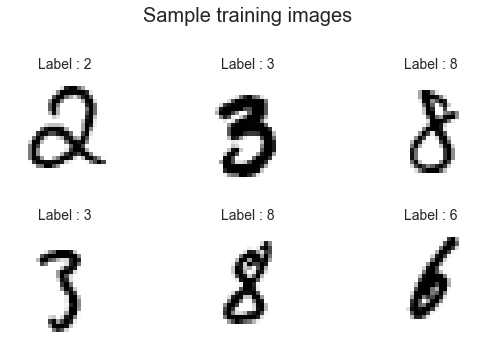

In [49]:
def inspect_sample_images(data, labels, title, n_rows = 2, n_cols = 3, seed = 42):
    np.random.seed(seed)
    indices = np.random.choice(range(len(data)), n_rows* n_cols, replace = False)

    plt.figure(figsize = (8, 5))
    for i, ind in enumerate(indices):
        ax = plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(data[ind], cmap = 'binary')
        plt.axis('off')
        plt.title(f"Label : {labels[ind]}", fontsize = 14)
    plt.suptitle(title, fontsize = 20)
    plt.tight_layout()

inspect_sample_images(train_data, train_labels, 'Sample training images')

This line of code uses NumPy's random.choice() function to randomly select a specified number of indices from a range of integers.

Here's a breakdown of the different parts of this line:

np.random.choice() is a function from the NumPy library that randomly selects elements from a given array or range of numbers.
range(len(data)) creates a range of integers from 0 to the length of the data array.
n_rows*n_cols is the total number of indices to select. This is typically used when creating a grid of subplots, where n_rows and n_cols represent the number of rows and columns in the grid, respectively.
replace=False ensures that the same index is not selected more than once. If replace=True, then the same index can be selected multiple times.
The result of this line of code is an array of n_rows*n_cols randomly selected indices, which can be used to index into the data array to select the corresponding elements. This is often used when creating a grid of subplots and selecting a subset of the data to display in each subplot